In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import holidays
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (explained_variance_score, 
                             mean_absolute_error, 
                             mean_squared_error, 
                             mean_squared_log_error,
                             r2_score)
from sklearn.model_selection import (GridSearchCV,
                                     TimeSeriesSplit)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import holidays
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (explained_variance_score, 
                             mean_absolute_error, 
                             mean_squared_error, 
                             mean_squared_log_error,
                             r2_score)
from sklearn.model_selection import (GridSearchCV,
                                     TimeSeriesSplit)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [93]:
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Calibri"
plt.style.use("ggplot")
teal = "#00C0D2"
light_blue = "#4251BC"
blue = "#262E6C"
dark_blue = "#111530"
black = "#000000"
cian = "#4AA6EE"

In [49]:
df : pd.DataFrame = pd.read_csv('./data/checkpoints/df_features_v1.csv',index_col='data-hora')
df.index = pd.to_datetime(df.index)
df.head(2)


C:\Users\augusto.lourencatto\AppData\Local\Temp\ipykernel_21588\3675590867.py:1: DtypeWarning: Columns (12,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df : pd.DataFrame = pd.read_csv('./data/checkpoints/df_features_v1.csv',index_col='data-hora')


,executado,data_medicao_A602,hora_medicao_A602,precipitacao_total_A602,pressao_atmosferica_A602,radiacao_global_A602,temperatura_ar_A602,temperatura_ponto_orvalho_A602,umidade_relativa_ar_A602,vento_direcao_A602,...,DayOfYear,WeekOfYear,lag_1,lag_7,lag_14,rolling_mean_1,rolling_mean_7,rolling_mean_14,el_nino,la_nina
data-hora,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,28212.46,2012-01-01,0,2.4,1007.3,-2.854,22.9,NaN,NaN,102.0,...,1,52,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2012-01-01 01:00:00,27511.77,2012-01-01,1,1.6,1007.6,-2.053,22.5,NaN,NaN,98.0,...,1,52,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [50]:
# Interpolando com o metodo de bfill
#TODO: Ver se é o melhor método, e fazer apenas para o valor target
#https://note.nkmk.me/en/python-pandas-interpolate/#:~:text=You%20can%20interpolate%20missing%20values,and%20Series%20with%20interpolate()%20.&text=Use%20dropna()%20and%20fillna,them%20with%20a%20specific%20value.

#bfill preenche com o próximo valor
#ffill preenche com o valor anterior
#spline interpolacao de spline



# df['val_cargaenergiahomwmed'] = df['val_cargaenergiahomwmed'].fillna(method='bfill')
# df['val_cargaenergiahomwmed'] = df['val_cargaenergiahomwmed'].fillna(method='ffill')
df = df.fillna(method='ffill')
df = df.interpolate(method='polynomial', order=2)
# df['val_cargaenergiahomwmed'] = df['val_cargaenergiahomwmed'].interpolate(method='time')

In [51]:
# df['val_cargaenergiahomwmed'].isnull().sum()
df.isnull().sum()

# df['val_cargaenergiahomwmed'][df['val_cargaenergiahomwmed'].isnull()]

executado                      0
data_medicao_A602              0
hora_medicao_A602              0
precipitacao_total_A602        0
pressao_atmosferica_A602       0
                            ... 
rolling_mean_1                95
rolling_mean_7               671
rolling_mean_14             1343
el_nino                        0
la_nina                        0
Length: 96, dtype: int64

In [52]:
columns_to_drop : list = ["dataref","max_executado","DATE","ORDINAL_DATE","LINREG","dia_semana"]
df.drop(columns_to_drop,axis=1,inplace=True)

In [53]:
df.to_csv("./data/checkpoints/df_final.csv")
df.head()

,executado,data_medicao_A602,hora_medicao_A602,precipitacao_total_A602,pressao_atmosferica_A602,radiacao_global_A602,temperatura_ar_A602,temperatura_ponto_orvalho_A602,umidade_relativa_ar_A602,vento_direcao_A602,...,DayOfYear,WeekOfYear,lag_1,lag_7,lag_14,rolling_mean_1,rolling_mean_7,rolling_mean_14,el_nino,la_nina
data-hora,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,28212.46,2012-01-01,0,2.4,1007.3,-2.854,22.9,NaN,NaN,102.0,...,1,52,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2012-01-01 01:00:00,27511.77,2012-01-01,1,1.6,1007.6,-2.053,22.5,NaN,NaN,98.0,...,1,52,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2012-01-01 02:00:00,26339.97,2012-01-01,2,6.0,1006.9,-1.742,22.5,NaN,NaN,105.0,...,1,52,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2012-01-01 03:00:00,25318.01,2012-01-01,3,1.6,1006.0,-2.066,22.6,NaN,NaN,99.0,...,1,52,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2012-01-01 04:00:00,24543.74,2012-01-01,4,0.6,1005.1,-1.992,22.7,NaN,NaN,57.0,...,1,52,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [54]:
# Filtrando apenas os dados maiores que 2017
# df : pd.DataFrame = df[df['ano'] >= 2017 ]
df : pd.DataFrame = df.loc['2017-02-17':'2020-01-01'] 
print(df.shape)
df.head()

(25176, 90)


,executado,data_medicao_A602,hora_medicao_A602,precipitacao_total_A602,pressao_atmosferica_A602,radiacao_global_A602,temperatura_ar_A602,temperatura_ponto_orvalho_A602,umidade_relativa_ar_A602,vento_direcao_A602,...,DayOfYear,WeekOfYear,lag_1,lag_7,lag_14,rolling_mean_1,rolling_mean_7,rolling_mean_14,el_nino,la_nina
data-hora,,,,,,,,,,,,,,,,,,,,,
2017-02-17 00:00:00,40343.629,2017-02-17,0,0.0,1013.4,-3.54,23.6,20.1,81.0,66.0,...,48,7,40103.017,37836.261,37577.945,42539.927625,39434.855629,38877.631404,0,1
2017-02-17 01:00:00,38070.227,2017-02-17,1,0.0,1013.7,-3.54,23.3,20.3,83.0,72.0,...,48,7,37952.307,35662.005,35364.094,42574.766094,39439.650332,38880.939665,0,1
2017-02-17 02:00:00,36765.324,2017-02-17,2,0.0,1013.6,-3.54,23.0,20.1,83.0,27.0,...,48,7,36679.225,34359.031,34220.664,42607.395208,39444.413031,38884.350645,0,1
2017-02-17 03:00:00,36014.643,2017-02-17,3,0.0,1013.4,-3.54,22.7,20.2,86.0,33.0,...,48,7,35834.896,33492.648,33632.403,42637.962427,39449.099192,38887.842019,0,1
2017-02-17 04:00:00,35903.391,2017-02-17,4,0.0,1013.1,-3.54,21.7,19.6,88.0,139.0,...,48,7,35686.435,33457.359,33659.155,42667.635844,39453.785289,38891.400702,0,1


In [55]:
a

NameError: name 'a' is not defined

In [56]:
# Dropando algumas colunas não necessárias
df.drop(['Date'],axis=1,inplace=True)

In [57]:
df = df[df.columns.drop(list(df.filter(regex='data_medicao')))]
df = df[df.columns.drop(list(df.filter(regex='hora_medicao')))]

In [81]:
df['executado'] = df['executado']/1000
df['executado'].head()

data-hora
2017-02-17 00:00:00    40.343629
2017-02-17 01:00:00    38.070227
2017-02-17 02:00:00    36.765324
2017-02-17 03:00:00    36.014643
2017-02-17 04:00:00    35.903391
Name: executado, dtype: float64

In [92]:
# Dividindo os dados de treino e teste

# df_train_xg = df.loc["2012-01-01":"2021-11-31 00:00"]
# df_test_xg = df.loc["2021-12-01 00:00":"2021-12-31 23:00"]


df_train_xg, df_test_xg = train_test_split(df, test_size=0.3, shuffle=False)

print(df_train_xg.shape,df_test_xg.shape)
print(f"Dados de treinamento : {min(df_train_xg.index)} - {max(df_train_xg.index)}")
print(f"Dados de teste : {min(df_test_xg.index)} - {max(df_test_xg.index)}")

X_train_xg = df_train_xg.drop(columns=["executado"],axis=1)
y_train_xg = df_train_xg["executado"]
X_test_xg = df_test_xg.drop(columns=["executado"],axis=1)
y_test_xg = df_test_xg["executado"]

(15105, 75) (10071, 75)
Dados de treinamento : 2017-02-17 00:00:00 - 2018-11-08 08:00:00
Dados de teste : 2018-11-08 09:00:00 - 2020-01-01 23:00:00


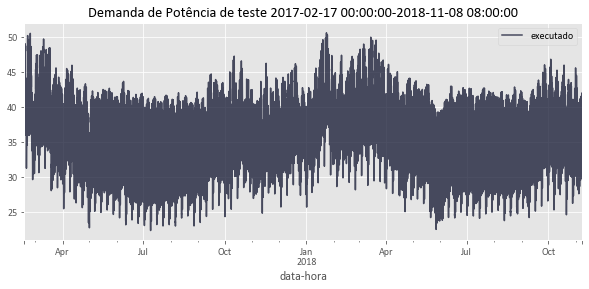

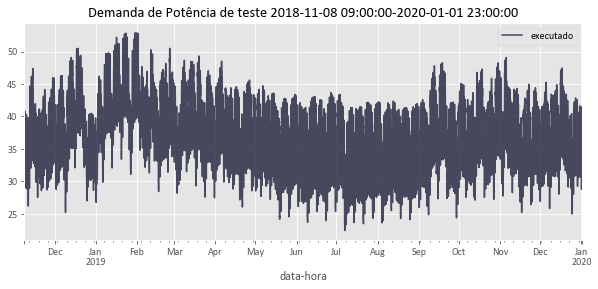

In [100]:
#Plots

df_train_lr : pd.DataFrame = df_train_xg.copy()
df_test_lr : pd.DataFrame = df_test_xg.copy()




# Comportamento dos dados de treino
df_train_lr.plot(
    y="executado",
    figsize=(10, 4),
    title=f"Demanda de Potência de teste {min(df_train_lr.index)}-{max(df_train_lr.index)}",
    c=dark_blue,
    alpha=0.75,
)
plt.show()

# Comportamento dos dados de teste
df_test_xg.plot(
    y="executado",
    figsize=(10, 4),
    title=f"Demanda de Potência de teste {min(df_test_xg.index)}-{max(df_test_xg.index)}",
    c=dark_blue,
    alpha=0.75,
)
plt.show()

# # 2019 - 2021
# df_demanda_potencia.loc["2019-01-01":"2021-12-31"].plot(
#     y="executado",
#     figsize=(10, 4),
#     title="Demanda de Potência 2019-2021",
#     c=dark_blue,
#     alpha=0.75,
# )
# plt.show()

# # Efeito Covid
# df_demanda_potencia.loc["2020-01-01":"2021-05-01"].plot(
#     y="executado",
#     figsize=(10, 4),
#     title="Demanda de Potência 2020 - 2021 (Efeito Covid 19)",
#     c=dark_blue,
#     alpha=0.75,
# )
# plt.show()

In [101]:
X_train_xg.to_csv("./data/temp/X_train_xg.csv")
y_train_xg.to_csv("./data/temp/y_train_xg.csv")

In [60]:
cv = TimeSeriesSplit(n_splits=5)

parameters = {"learning_rate": [0.1, 0.05],
              #The learning rate is the shrinkage you do at every step you are making

               "gamma" : [0.01, 0.1, 0.3, 0.5],
              #A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
              #Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.
              
               "max_depth": [2, 4, 7, 10],
              #The maximum depth of a tree, same as GBM.
              #Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.

               "colsample_bytree": [0.3, 0.6],
              #Denotes the fraction of columns to be randomly samples for each tree.

               "subsample": [0.2, 0.4, 0.5],
              #Denotes the fraction of observations to be randomly samples for each tree.
              #Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.

               "reg_alpha": [0, 0.5, 1],
              #L1 regularization term on weights. Increasing this value will make model more conservative.

               "reg_lambda": [1, 1.5, 2, 3, 4.5],
              #L2 regularization term on weights. Increasing this value will make model more conservative.

               "min_child_weight": [1, 3, 5, 7],
              #The larger min_child_weight is, the more conservative the algorithm will be.

               "n_estimators": [100, 250, 500]}
              #Number of tress or rounds. The more, the higher the risk of overfitting

xgbr = xgb.XGBRegressor(objective='reg:squarederror' , sampling_method = 'gradient_based', tree_method = 'gpu_hist')

xgb_rscv = RandomizedSearchCV(xgbr, param_distributions = parameters,  verbose = 3, random_state = 40, cv=cv)

In [ ]:
# Label containes NaN

model_xgboost = xgb_rscv.fit(X_train_xg, y_train_xg)

In [102]:
model_xgboost.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, enable_categorical=False,
             gamma=0.3, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=3, sampling_method='gradient_based', scale_pos_weight=1,
             subsample=0.4, tree_method='gpu_hist', validate_parameters=1,
             verbosity=None)

In [103]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, enable_categorical=False,
             gamma=0.3, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=np.nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=3, sampling_method='gradient_based', scale_pos_weight=1,
             subsample=0.4, tree_method='gpu_hist', validate_parameters=1,
             verbosity=None)


reg = xgb.XGBRegressor()

In [ ]:
# joblib.dump(reg, "./models/xgboost_v1.joblib.dat")
# loaded_model = joblib.load("./models/xgboost_v1.joblib.dat")

In [63]:
#MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
import datetime as dt
from datetime import timedelta

def expandingWindowDiario(df : pd.DataFrame, test_start_date : dt, stop_date : dt):
  mae_modelo = []
  mape_modelo = []
  column_names = ["Date", "val_cargaenergiahomwmed"	,"EXECUTADO_MODELO"]
  df_previsao = pd.DataFrame(columns = column_names)
  # train_start_date = dt.datetime(2012,1,1,0,0,0)
  train_start_date = dt.datetime(2012,1,1,0,0,0)
  train_end_date = test_start_date
  test_end_date = test_start_date + timedelta(hours = 24)

  df.index = pd.to_datetime(df.index)

  while test_start_date < stop_date:

    print("TRAIN:",train_start_date," - ",train_end_date)
    print("TEST:",test_start_date," - ",test_end_date)

    df_train=df.loc[train_start_date:train_end_date].copy()
    df_test=df.loc[test_start_date:test_end_date].copy()

    columns_to_drop : list = ["val_cargaenergiahomwmed","nom_subsistema","id_subsistema","dataref","max_executado","DATE","ORDINAL_DATE","LINREG","dia_semana"]

    X_training = df_train.drop(columns=columns_to_drop).copy()
    y_training = df_train["val_cargaenergiahomwmed"].copy()
    X_test = df_test.drop(columns=columns_to_drop).copy()
    y_test = df_test["val_cargaenergiahomwmed"].copy()

    reg.fit(X_training, y_training,
          verbose=False)
    yhat = reg.predict(X_test)

    #Erro
    maeTeste = mean_absolute_error(y_test,yhat)
    mae_modelo.append(maeTeste)
    mape_teste = mean_absolute_percentage_error(y_test,yhat)
    mape_modelo.append(mape_teste)
    d = {'Date' :y_test.index ,'Real':y_test,'Modelo':yhat}
    previsao = pd.DataFrame(data=d)
    df_previsao=df_previsao.append(previsao)

    #Avança
    train_end_date = train_end_date + timedelta(days = 1)
    test_start_date = test_start_date + timedelta(days = 1)
    test_end_date = test_end_date + timedelta(days = 1)

  return ([df_previsao,mae_modelo, mape_modelo])
  # return 1,1,1

# df_train_xg = df.loc["2012-01-01":"2020-31-12 00:00"]
# df_test_xg = df.loc["2021-01-01 00:00":"2021-12-31 23:00"]



# df_previsao,mae_full,mape_full = expandingWindowDiario(df_completo,dt.datetime(2021,1,1,0,0,0),dt.datetime(2021,12,31,0,0,0))



# dt.datetime(2021,1,1,0,0,0)

In [105]:
%%time

reg.fit(X_train_xg, y_train_xg,
          verbose=False)

c:\Users\augusto.lourencatto\Desktop\me\TCC\venv\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


CPU times: total: 18 s
Wall time: 3.22 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [106]:
yhat = reg.predict(X_test_xg)
maeTeste = mean_absolute_error(y_test_xg,yhat)
mape_teste = mean_absolute_percentage_error(y_test_xg,yhat)
maeTeste,mape_teste

(1.2669403780594466, 3.4253132100170434)

In [107]:
%%time
#Sem rooling windows
y_true, y_pred = np.array(y_test_xg), np.array(yhat)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape

CPU times: total: 0 ns
Wall time: 0 ns


3.4253132100170434

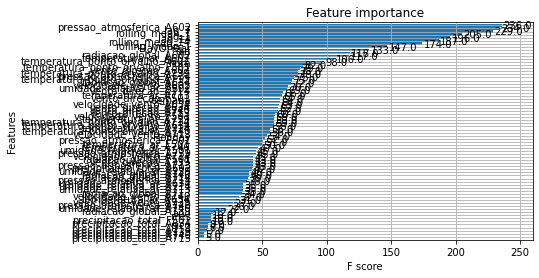

In [88]:
_ = plot_importance(reg, height=0.9)

In [119]:
# https://towardsdatascience.com/time-series-forecast-error-metrics-you-should-know-cc88b8c67f27

def mae(y, y_hat):
    """
    Calculate the mean absolute error between two arrays.
    """
    return np.mean(np.abs(y - y_hat))

def mse(y, y_hat):
    return np.mean(np.square(y - y_hat))

def rmse(y, y_hat):
    return np.sqrt(np.mean(np.square(y - y_hat)))

def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat)/y)*100)

In [123]:
# Montando o dataframe de previsão

df_resultado : pd.DataFrame = pd.DataFrame({"previsao":yhat,"real": y_test_xg})

# Criando coluna com diferência entre previsão e real
df_resultado['diferenca'] = abs(df_resultado['previsao'] - df_resultado['real'])

print(f"MAE: {mae(df_resultado['real'],df_resultado['previsao'])}")
print(f"MSE: {mse(df_resultado['real'],df_resultado['previsao'])}")
print(f"RMSE: {rmse(df_resultado['real'],df_resultado['previsao'])}")
# print(f"MAPE: {mape(df_resultado['real'],df_resultado['previsao'])}")

df_resultado.to_csv("./data/resultados/previsao_xgboost_v1.csv")
df_resultado.tail()

MAE: 1.2669403780594466
MSE: 3.145913227660605
RMSE: 1.773672243584086


,previsao,real,diferenca
data-hora,,,
2020-01-01 19:00:00,39.929024,38.572758,1.356266
2020-01-01 20:00:00,40.658474,39.314780,1.343693
2020-01-01 21:00:00,38.801239,39.236211,0.434972
2020-01-01 22:00:00,39.458244,38.624095,0.834149
2020-01-01 23:00:00,34.537888,37.077144,2.539257


3.4253132100170434